In [1]:
# fuzzy computations library
import skfuzzy as fuzz
# numerical computations library
import numpy as np
# plotting library
import matplotlib.pyplot as plt

In [2]:
# just some color for plot to choose
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# clusture centers
centers = [[4,2],[1,7],[5,6],[12,8]]

# clusture sigmas in x and y, respectively
sigmas = [[0.8, 0.3],[0.3, 0.5],[1.1, 0.7],[.7, 1.5]]

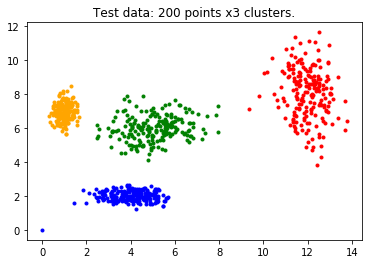

In [3]:
# generating random clusture data
np.random.seed(20) # Set seed for reproducibility
# initializing some variables
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

# calculating the data for 3 clustures ;) with
# center data -> mu value
# sigmas -> sigmas value

for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(4):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',color=colors[label])
    ax0.set_title('Test data: 200 points x3 clusters.')


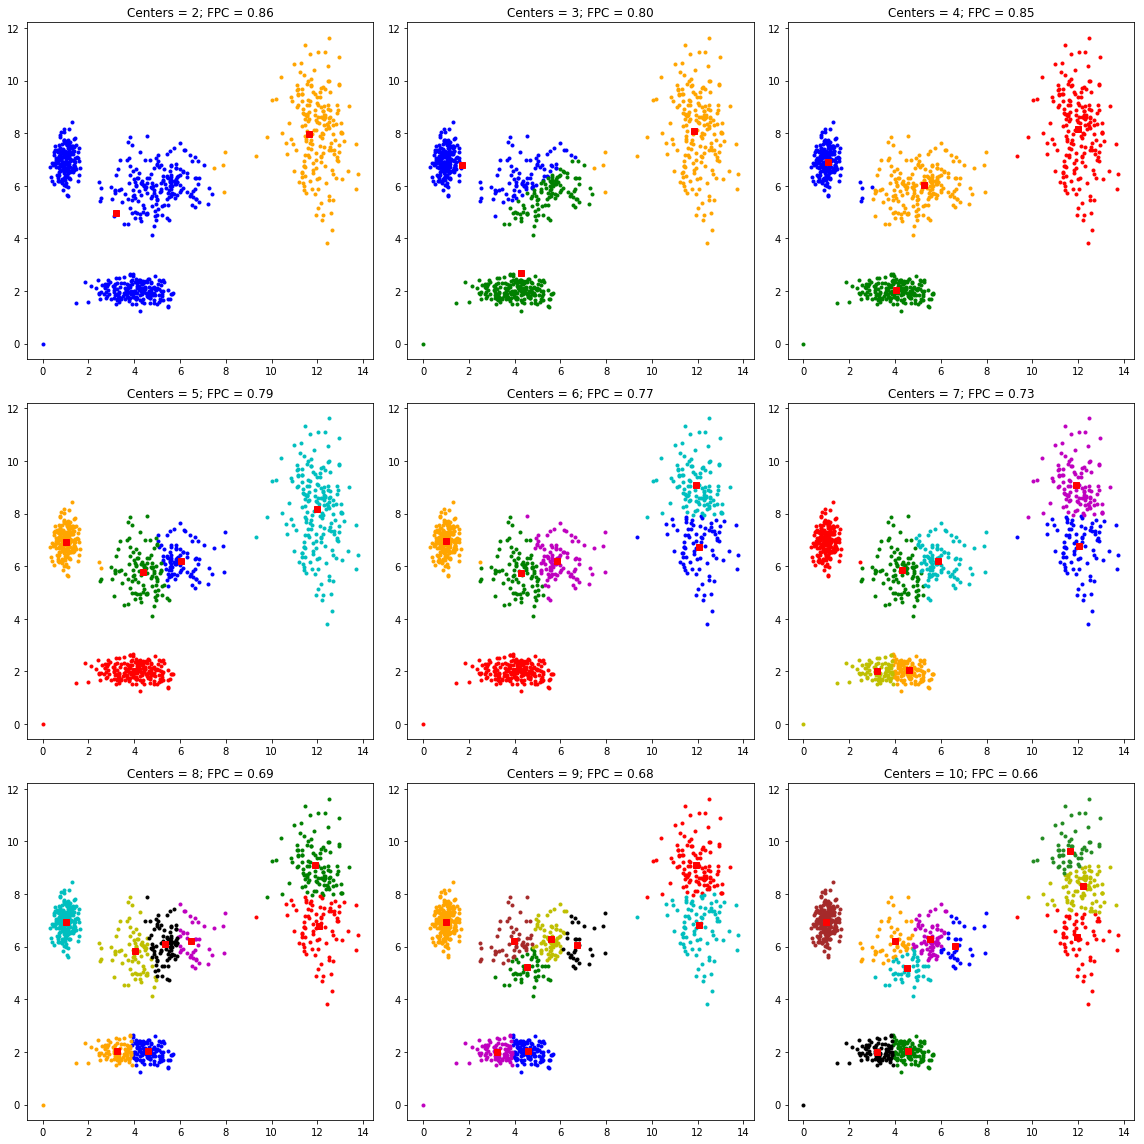

In [4]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(16, 16))
# vertical stacking
alldata = np.vstack((xpts, ypts))
# fuzzy partition coefficient
fpcs = [] 
# main loop
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # here we execute the clusturing 
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    # Store fpc values for later
    fpcs.append(fpc)
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j], '.', color=colors[j])
    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
        
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
#     ax.axis('off')
fig1.tight_layout()


Text(0,0.5,'Fuzzy partition coefficient')

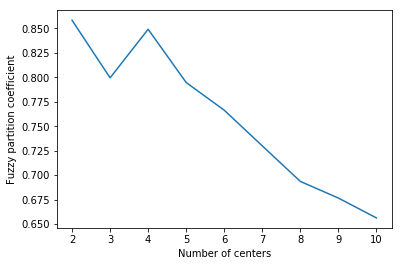

In [5]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")